# Abstract

The aim of this report is going to create a model to predict whether a patient have stroke. The dataset has some features which can be used to predict stroke. These features are gender, age, hypertension, heart disease, marriage status, work type, residence type, glucose level, bmi, smoking status and target variable which is stroke result. This report can be used to support the medical staff to make better decision and to warn the high-risk personnel. According to [World Health Organisation (WHO)](https://www.who.int/news-room/fact-sheets/detail/the-top-10-causes-of-death), stroke is the second high cause of death in the world. As a result, machine learning technique can be applied to help doctors to provide care and treat the patients in the early stage.

The dataset will be processed with neural network algorithm, and hyperparameters will be adjusted to effectively train the model. There are two hyperparameters will be tuned to find the better model which are hidden layer and neural node.

The best model has high accuracy, however, there are some issues are exposed in the analysis. The dataset is highly unbalanced, and some features contain missing data. Moreover, the size of dataset becomes very small after resampling the dataset, so it might not train the model effectively. Furthermore, the approach of collecting dataset is unknow, so it will cause some problems. 


# Problem

This model will predict the patients who have stroke based on the patients’ health data and behaviours. The data is from [Kaggle](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset) and the source is confidential. The dataset has some features which can be used to predict stroke. These features are gender, age, hypertension, heart disease, marriage status, work type, residence type, glucose level, bmi, smoking status and target variable which is stroke result. The classification machine learning algorithm will be applied with these features to predict the result. 

The problem of this report attempts to answer is:

> Is there any approach to determine the patients who are in the high risk of stroke with the health data and activity of patients?

To help medical staff to identify whether the patient is in the risk of having stroke is the goal of this report. According to WHO, the definition of stroke is that “rapidly developing clinical signs of focal (or global) disturbance of cerebral function, with symptoms lasting 24 hours or longer or leading to death, with no apparent cause other than vascular origin”. [WHO](https://www.who.int/news-room/fact-sheets/detail/the-top-10-causes-of-death) mentioned that stoke is responsible for 11% total death in the world from 2000 to 2019, and it is second high in the top10 leading causes of death. The result of this report can be used to help doctors to detect the patient with stroke early. As a result, the medical professionals can treat the patient who is positive in the prediction in the early stage. It can reduce the chance of permanent damage to the paitent.


In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# keras / deep learning libraries
import numpy as np
import random as rn
import tensorflow as tf
import csv

# For reproduciability reasons:
np.random.seed(515)
rn.seed(515)

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import model_from_json
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import plot_model

# callbacks
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.image as mpimg
import pylab as pl
from pylab import savefig

plt.style.use('seaborn-deep')
%matplotlib inline

from sklearn import datasets
from sklearn.model_selection import train_test_split
# very important for feature transformation
from sklearn.preprocessing import OneHotEncoder, StandardScaler,MinMaxScaler

sns.set()

In [2]:
# random_state
rs = 7

## Read Data

In [3]:
dataset_path = "data/stroke.csv"
class_var = "stroke"
dataset = pd.read_csv( dataset_path )
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Missing value

The bmi contains missing data, it will be filled with mean value.

In [5]:
dataset["bmi"].fillna(dataset["bmi"].mean(), inplace = True)
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Visualise data

### continous data

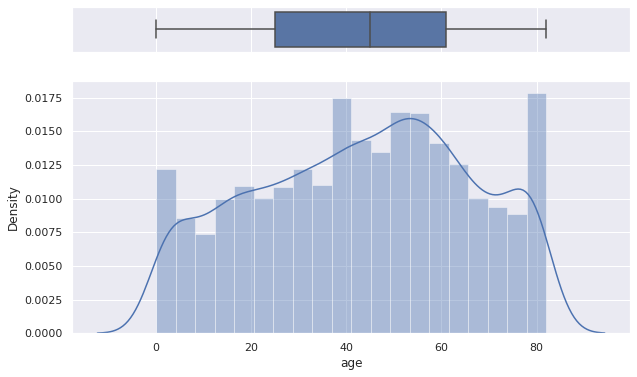

In [8]:
# Source: https://www.python-graph-gallery.com/24-histogram-with-a-boxplot-on-top-seaborn
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10,6))

# assigning a graph to each ax
sns.boxplot(dataset["age"], ax=ax_box)
sns.distplot(dataset["age"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

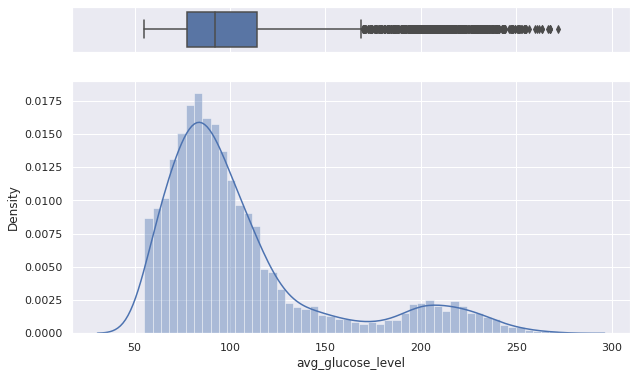

In [9]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10,6))

# assigning a graph to each ax
sns.boxplot(dataset["avg_glucose_level"], ax=ax_box)
sns.distplot(dataset["avg_glucose_level"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

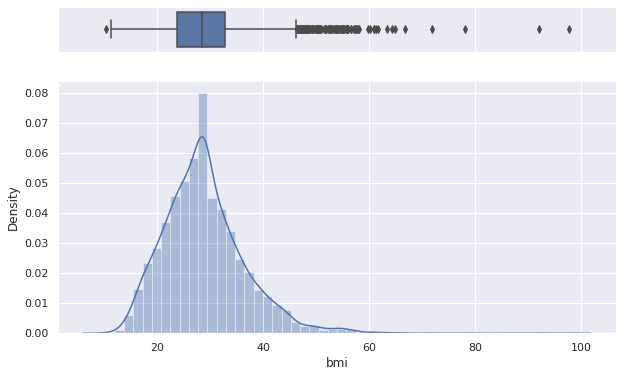

In [10]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10,6))

# assigning a graph to each ax
sns.boxplot(dataset["bmi"], ax=ax_box)
sns.distplot(dataset["bmi"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

### Categorical data

<AxesSubplot:xlabel='gender', ylabel='count'>

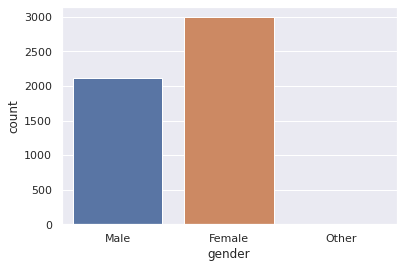

In [11]:
sns.countplot(dataset["gender"])

In [12]:
dataset.loc[dataset["gender"] == "Other"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


<AxesSubplot:xlabel='hypertension', ylabel='count'>

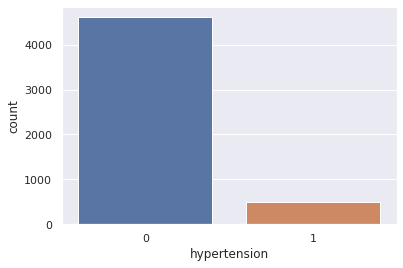

In [13]:
sns.countplot(dataset["hypertension"])

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

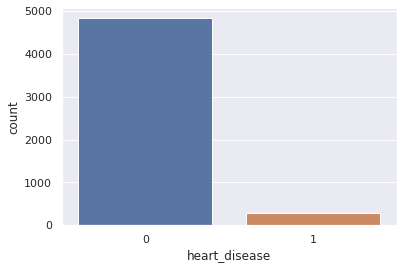

In [14]:
sns.countplot(dataset["heart_disease"])

<AxesSubplot:xlabel='ever_married', ylabel='count'>

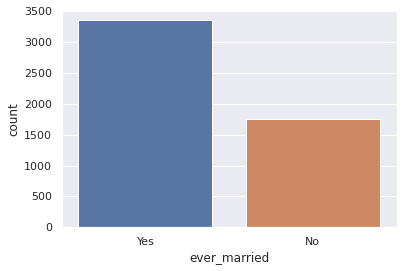

In [15]:
sns.countplot(dataset["ever_married"])

<AxesSubplot:xlabel='work_type', ylabel='count'>

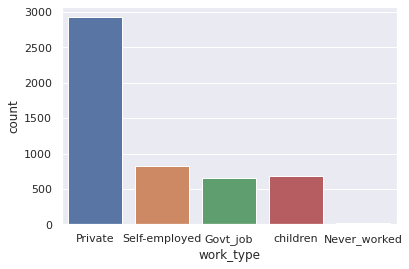

In [16]:
sns.countplot(dataset["work_type"])

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

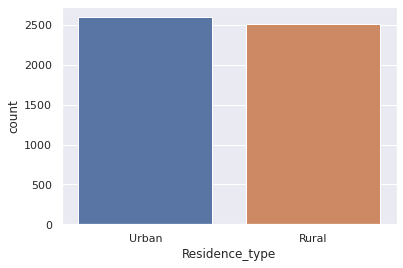

In [17]:
sns.countplot(dataset["Residence_type"])

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

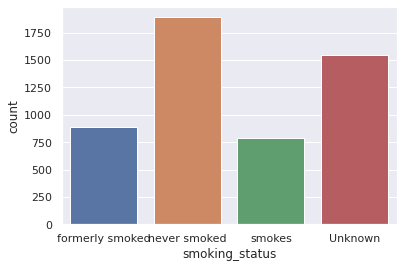

In [18]:
sns.countplot(dataset["smoking_status"])

<AxesSubplot:xlabel='stroke', ylabel='count'>

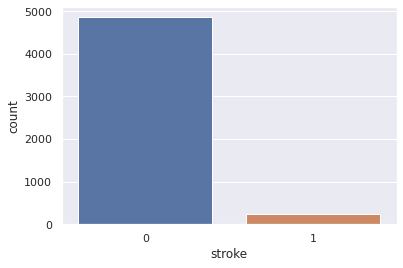

In [19]:
sns.countplot(dataset["stroke"])

1. The value of age is scattered across all age groups and they are all positive.

2. "gender == Other" just has **one data**, so it need to be removed. 

3. Most of avg_glucose_level data is smaller than 150, but there is still a small group of data between 175 and 250.

4. Most of bmi data is in the range of 20 to 60, there are still some outliers greater than 60.

5. Most of patients does not have hypertension and heart disease.

6. Stroke is our target, and it is **hightly unblanced**.

### Remove Other in gender

In [20]:
dataset.drop(dataset.loc[dataset["gender"] == "Other"].index, inplace = True)

<AxesSubplot:xlabel='gender', ylabel='count'>

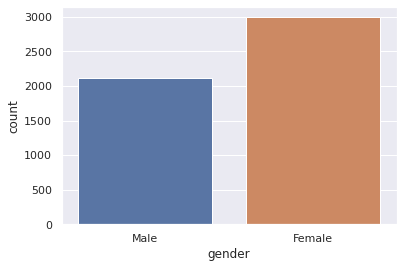

In [21]:
sns.countplot(dataset["gender"])

## Correlation matrix

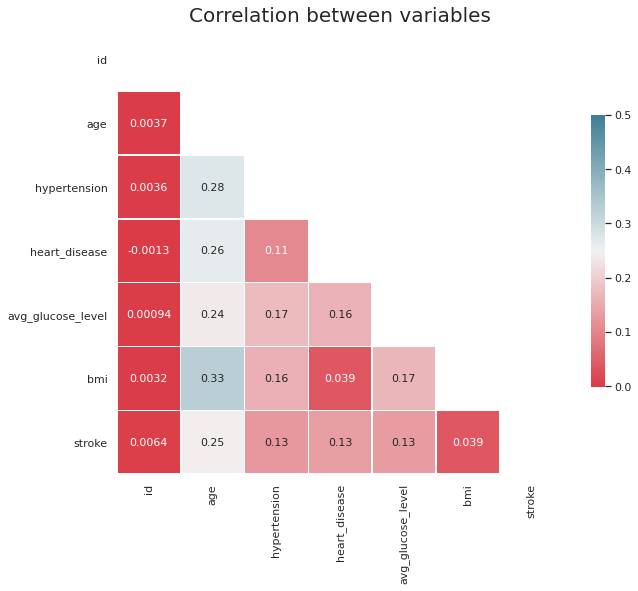

In [22]:
correlation_matrix = dataset.corr()
sns.set(style='white')

mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10,10))

cmap = sns.diverging_palette(10,220, as_cmap=True)

ax = sns.heatmap(correlation_matrix, mask=mask, 
                 cmap=cmap, vmax= .5, annot=True, annot_kws= {'size':11}, 
                 square=True, xticklabels=True, yticklabels=True, linewidths=.5, 
                 cbar_kws={'shrink': .5}, ax=ax)

ax.set_title('Correlation between variables', fontsize=20);

1. `Age` has the highest positive correlation (0.25) with stroke which means older individuals have higher chance of having stroke.
2. `hypertension` and `heart_disease` have positive correlation with stroke. This means people have hypertension or heart disease have higher change of having stroke.
3. The correlation between `stroke` and `avg_glucose_level` is positive. This menas the higher avg_glucose_level will causes people have stroke.

## Convert binary category into [0, 1]

There are three variable need to be converted

1. gender

2. ever_married

3. Residence_type

In [23]:
print(dataset["gender"].unique())
print(dataset["ever_married"].unique())
print(dataset["Residence_type"].unique())

['Male' 'Female']
['Yes' 'No']
['Urban' 'Rural']


In [24]:
dataset["gender"] = dataset["gender"].map({'Male': 1, 'Female': 0})
dataset["ever_married"] = dataset["ever_married"].map({'Yes': 1, 'No': 0})
dataset["Residence_type"] = dataset["Residence_type"].map({'Urban': 1, 'Rural': 0})

In [25]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,51676,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,31112,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,60182,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,1665,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,Private,1,83.75,28.893237,never smoked,0
5106,44873,0,81.0,0,0,1,Self-employed,1,125.20,40.000000,never smoked,0
5107,19723,0,35.0,0,0,1,Self-employed,0,82.99,30.600000,never smoked,0
5108,37544,1,51.0,0,0,1,Private,0,166.29,25.600000,formerly smoked,0


In [26]:
print(dataset["gender"].unique())
print(dataset["ever_married"].unique())
print(dataset["Residence_type"].unique())

[1 0]
[1 0]
[1 0]


## Encoding categorical data

Dummies value approach is applied to encode.

gender, ever_married, work_type, Residence_type, smoking_status

In [27]:
print(dataset["work_type"].unique())
print(dataset["smoking_status"].unique())

['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [28]:
dataset = pd.get_dummies(dataset, columns=["work_type", "smoking_status"])

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5109 non-null   int64  
 1   gender                          5109 non-null   int64  
 2   age                             5109 non-null   float64
 3   hypertension                    5109 non-null   int64  
 4   heart_disease                   5109 non-null   int64  
 5   ever_married                    5109 non-null   int64  
 6   Residence_type                  5109 non-null   int64  
 7   avg_glucose_level               5109 non-null   float64
 8   bmi                             5109 non-null   float64
 9   stroke                          5109 non-null   int64  
 10  work_type_Govt_job              5109 non-null   uint8  
 11  work_type_Never_worked          5109 non-null   uint8  
 12  work_type_Private               51

In [30]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,28.893237,1,0,0,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.400000,1,0,0,1,0,0,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,24.000000,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,1,83.75,28.893237,0,0,0,1,0,0,0,0,1,0
5106,44873,0,81.0,0,0,1,1,125.20,40.000000,0,0,0,0,1,0,0,0,1,0
5107,19723,0,35.0,0,0,1,0,82.99,30.600000,0,0,0,0,1,0,0,0,1,0
5108,37544,1,51.0,0,0,1,0,166.29,25.600000,0,0,0,1,0,0,0,1,0,0


### Correlation matrix

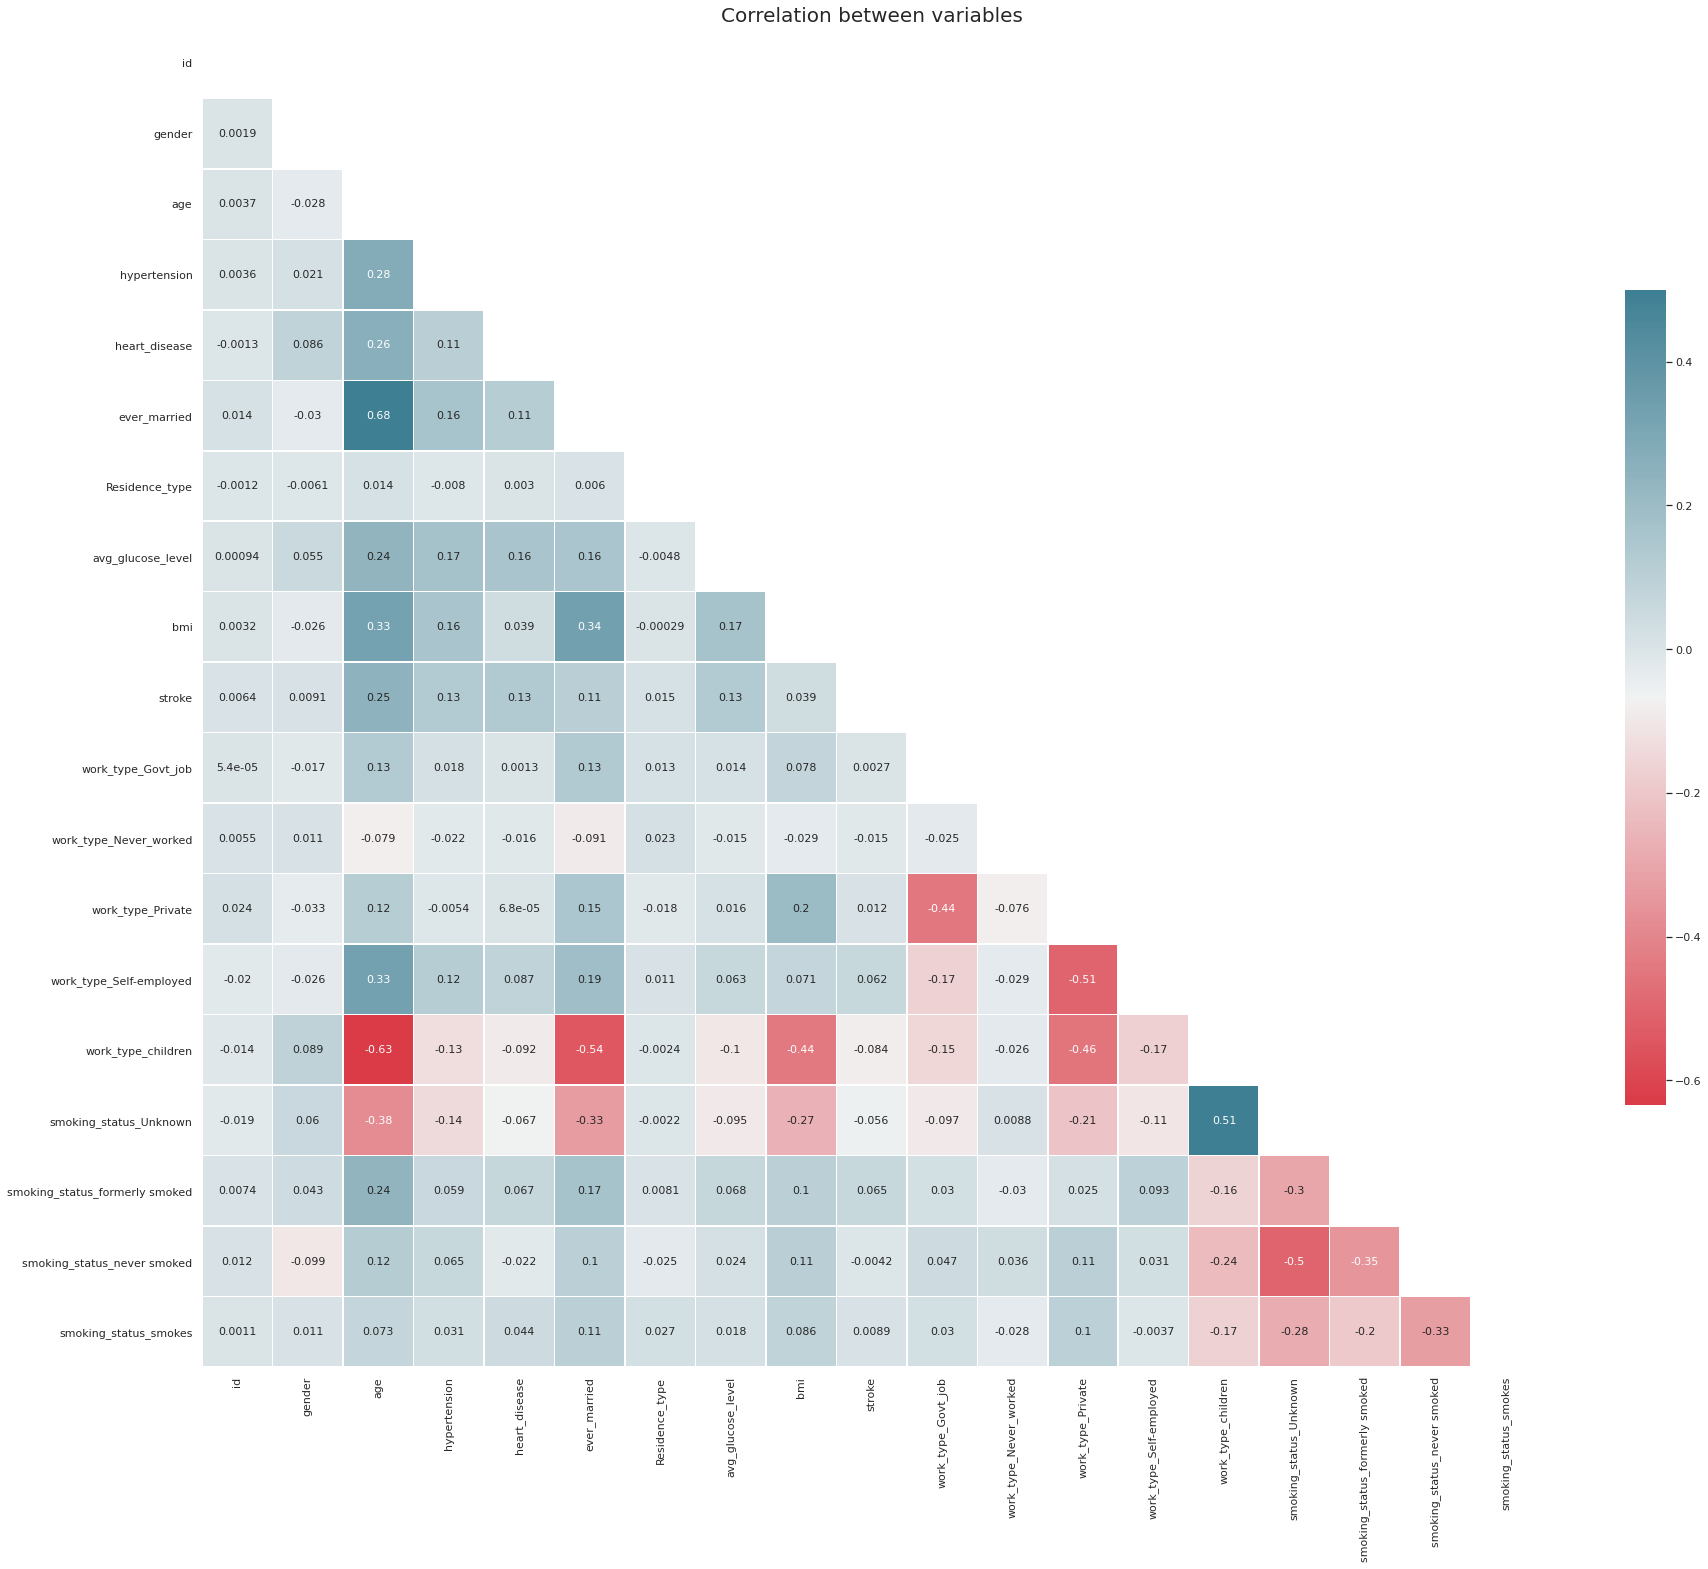

In [31]:
correlation_matrix = dataset.corr()
sns.set(style='white')

mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(30,30))

cmap = sns.diverging_palette(10,220, as_cmap=True)

ax = sns.heatmap(correlation_matrix, mask=mask, 
                 cmap=cmap, vmax= .5, annot=True, annot_kws= {'size':11}, 
                 square=True, xticklabels=True, yticklabels=True, linewidths=.5, 
                 cbar_kws={'shrink': .5}, ax=ax)

ax.set_title('Correlation between variables', fontsize=20);

## Resampling data

There are 4861 paitents do not have stroke, but there are only 249 paitents have stroke.

As a result, data need to be resampling since it is highly unbalanced. 

The undersampling technique is applied to resampling the data.

In [32]:
dataset["stroke"].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

In [33]:
stroke_0, stroke_1 = dataset["stroke"].value_counts()
stroke_1

249

In [34]:
df_stroke_0 = dataset[dataset["stroke"] == 0]
df_stroke_1 = dataset[dataset["stroke"] == 1]

df_stroke_resample_0 = df_stroke_0.sample(stroke_1, random_state=rs)
dataset_resampling = pd.concat([df_stroke_1, df_stroke_resample_0], axis = 0)

In [35]:
dataset_resampling["stroke"].value_counts()

0    249
1    249
Name: stroke, dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='count'>

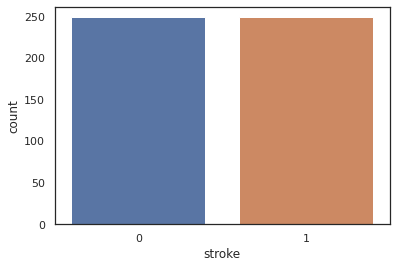

In [36]:
sns.countplot(dataset_resampling["stroke"])

## Remove data

`ID` is unnecessary data in this analysis, so it need to be removed.

In [37]:
dataset_resampling.drop(columns=["id"], inplace = True)

In [38]:
dataset_resampling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 4290
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          498 non-null    int64  
 1   age                             498 non-null    float64
 2   hypertension                    498 non-null    int64  
 3   heart_disease                   498 non-null    int64  
 4   ever_married                    498 non-null    int64  
 5   Residence_type                  498 non-null    int64  
 6   avg_glucose_level               498 non-null    float64
 7   bmi                             498 non-null    float64
 8   stroke                          498 non-null    int64  
 9   work_type_Govt_job              498 non-null    uint8  
 10  work_type_Never_worked          498 non-null    uint8  
 11  work_type_Private               498 non-null    uint8  
 12  work_type_Self-employed         498

## Feature transform

In [39]:
feature_names = dataset_resampling.columns.tolist()
feature_names.remove(class_var)

# separate value
X = dataset_resampling[feature_names].values
y = dataset_resampling[class_var].values

n_samples, n_features = X.shape
n_classes = len(dataset[class_var].unique())

print("There are a total of %d training instances, %d features and a total of %d classes\n" %(n_samples, n_features, n_classes))

There are a total of 498 training instances, 17 features and a total of 2 classes



In [40]:
X[0:5, :]

array([[  1.        ,  67.        ,   0.        ,   1.        ,
          1.        ,   1.        , 228.69      ,  36.6       ,
          0.        ,   0.        ,   1.        ,   0.        ,
          0.        ,   0.        ,   1.        ,   0.        ,
          0.        ],
       [  0.        ,  61.        ,   0.        ,   0.        ,
          1.        ,   0.        , 202.21      ,  28.89323691,
          0.        ,   0.        ,   0.        ,   1.        ,
          0.        ,   0.        ,   0.        ,   1.        ,
          0.        ],
       [  1.        ,  80.        ,   0.        ,   1.        ,
          1.        ,   0.        , 105.92      ,  32.5       ,
          0.        ,   0.        ,   1.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   1.        ,
          0.        ],
       [  0.        ,  49.        ,   0.        ,   0.        ,
          1.        ,   1.        , 171.23      ,  34.4       ,
          0.        ,   0.        ,

### scale data to 0 ~ 1

In [41]:
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

X_scaled[0:5, :]

array([[1.        , 0.81671554, 0.        , 1.        , 1.        ,
        1.        , 0.80114555, 0.5232816 , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        ],
       [0.        , 0.74340176, 0.        , 0.        , 1.        ,
        0.        , 0.67883043, 0.35239993, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [1.        , 0.97556207, 0.        , 1.        , 1.        ,
        0.        , 0.23405238, 0.43237251, 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.        , 0.59677419, 0.        , 0.        , 1.        ,
        1.        , 0.53572913, 0.47450111, 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        ],
       [0.        , 0.96334311, 1.        , 0.      

In [42]:
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

In [43]:
Y[0:5]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

## Training process

### Split data

Firstly, the dataset will be splitted into training and testing dataset, the ratio is 7:3.

Secondly, the testing dataset will be splitted into testing and validation dataset, the ration is 5:5.

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=rs)
X_validation, X_test, Y_validation, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=rs)

### Create a general nn model

In [45]:
def create_model(input_dim, output_dim, nodes, hidden_layers=1, loss_func='categorical_crossentropy', optim='nadam', metrics=['accuracy'], name='model'):
    
    model = Sequential(name=name)

    # adding a sequence of layers according to the fucntion's input params
    model.add( Dense(nodes, input_dim=input_dim, activation='relu'))  # input layer
    for i in range(hidden_layers):                                    # hidden layers
        model.add(Dense(nodes, activation='relu'))  
    model.add(Dense(output_dim, activation='softmax'))                # output layer

    # Compile model
    if( optim == "nadam" ):
        optim = keras.optimizers.Nadam(lr=0.0001, beta_1=0.9, beta_2=0.999)
  
    model.compile(loss=loss_func, optimizer=optim, metrics=metrics)
    return model

### Saving and loading models

In [46]:
# SERIALIZE_MODEL ------------------------------------------
def serialize_model( model, model_name, path ):
    
    # serialize model to JSON
    model_json = model.to_json()
    with open(path + model_name+"_DUO.json", "w") as json_file:
        json_file.write(model_json)
    
    # serialize weights to HDF5
    model.save_weights(path + model_name+"_DUO.tf",save_format='tf')
    print(f"{model_name} saved to disk") 

# SERIALIZE_MODEL_HISTORY ------------------------------------------
def serialize_model_history(  model_hist, model_name, path ):
    file = open(path + model_name + "_hist.csv", "w")
    w = csv.writer( file )
    
    for key, val in model_hist.history.items():
        w.writerow([key, val])
    file.close()
    print(f"{model_name} history saved to disk") 

# LOAD_MODEL_HISTORY ------------------------------------------
def load_model_history( model_name, path):
    
    model_hist_loaded = {}
    values = []
    
    # load dictionary
    r = open( path + model_name + "_hist.csv", "r").read()
    for line in r.split("\n"):
        if(len(line) == 0):
            continue
            
        metric = line.split(",\"[")[0]                                    # extract metrics
        values_str = line.split(",\"[")[1].replace("]\"","").split(", ")  # extract validation values
        values = [float(val_str) for val_str in values_str]
        model_hist_loaded.update( {metric : values} )
    return model_hist_loaded

# LOAD_MODEL ------------------------------------------
def load_model( model_name, path ):
    json_file = open( path + model_name +  "_DUO.json", 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    
    # load weights into new model
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights(path + model_name +  "_DUO.tf")
    print("Loaded model from disk")
    return loaded_model

### Plot learning curve

In [47]:
# plot training curves
def plot_training_curve(history):
    
    f, axarr = plt.subplots(1,2)
    f.set_figheight(5)
    f.set_figwidth(10)

    axarr[0].plot(history['loss'], label='train')
    axarr[0].plot(history['val_loss'], label='val')
    axarr[0].set_ylabel('loss', fontsize=12)
    axarr[0].set_xlim(0,150)
    axarr[0].set_xlabel('iterations', fontsize=12)
    axarr[0].set_ylim(0,1)
    
    axarr[1].plot(history['accuracy'], label='train')
    axarr[1].plot(history['val_accuracy'], label='val')
    axarr[1].set_ylabel('accuracy', fontsize=12)
    axarr[1].set_xlabel('iterations', fontsize=12)
    axarr[1].set_ylim(0.3,0.9)
    plt.legend()
    plt.tight_layout()
    plt.show()

#### Looking for the best models: Grid Search

In [48]:
MAX_NODES = 12
MAX_HLAYERS = 4
DEBUG = False
models = []
metrics = ['accuracy']

# DEFINE DIFFERENT MODELS WITH DIFFERENT NUMBER OF HIDDEN LAYERS
# AND DIFFERENT NUMBER OF NEURONS
for neuron in range(4, MAX_NODES+1):
    print("-----------------------------------")
    for hidden_layer in range(1, MAX_HLAYERS+1):
        model_name = "model_h" + str(hidden_layer) + "_N"+str(neuron)
        model = create_model(n_features, n_classes, neuron, hidden_layer, name=model_name, metrics = metrics)
        
        print("Generating model: " + model_name)
        models.append( model )
        
    # plot general information for each model
    if( DEBUG ):  
        for model in models:
            model.summary()

-----------------------------------
Generating model: model_h1_N4
Generating model: model_h2_N4
Generating model: model_h3_N4
Generating model: model_h4_N4
-----------------------------------
Generating model: model_h1_N5
Generating model: model_h2_N5
Generating model: model_h3_N5
Generating model: model_h4_N5
-----------------------------------
Generating model: model_h1_N6
Generating model: model_h2_N6
Generating model: model_h3_N6
Generating model: model_h4_N6
-----------------------------------
Generating model: model_h1_N7
Generating model: model_h2_N7
Generating model: model_h3_N7
Generating model: model_h4_N7
-----------------------------------
Generating model: model_h1_N8
Generating model: model_h2_N8
Generating model: model_h3_N8
Generating model: model_h4_N8
-----------------------------------
Generating model: model_h1_N9
Generating model: model_h2_N9
Generating model: model_h3_N9
Generating model: model_h4_N9
-----------------------------------
Generating model: model_h1_N

In [49]:
FLAG = False 
models_path = "./trained_models/"

# START THE GRID SEARCH
EPOCHS = 150
BATCH_SIZE = 1

HISTORY_DICT = {}

if FLAG:
    patience = 10 # how many iterations to be considered a convergence

    # define the callebacks to take into consideration during training
    # stop training when convergence is achieved after 10 iterations
    early_stop = EarlyStopping(monitor='val_loss', patience=patience, verbose=1, mode='min')
    # save the model after every epoch
    callbacks_list = [early_stop]
    
    # grid search over each model
    for model in models:
        print('MODEL NAME:', model.name)
        history_callback = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS,
                                 verbose=0, validation_data=(X_validation, Y_validation), callbacks=callbacks_list)
        
        score_test = model.evaluate( X_test, Y_test, verbose=0 )
        score_train = model.evaluate( X_train, Y_train  )
        
        print('Test loss:     ', format(score_test[0], '.4f'), '\tTrain loss: ', format(score_train[0], '.4f') )
        print('Test accuracy: ', format(score_test[1], '.4f'), '\tTrain accu: ', format(score_train[1], '.4f') )
        print('Abs accuracy:  ', format( np.abs( score_test[1] - score_train[1] ), '.4f'))
        print('Abs loss:      ', format( np.abs( score_test[0] - score_train[0] ), '.4f'))
        print('\n###########################################################\n')

        HISTORY_DICT[model.name] = [history_callback, model]
        
        # save the model to a file, so we do not have to run the Grid Search function again
        # serialize best model to JSON and weights to HDF5
        serialize_model( model, model.name, models_path )
        
        # serialize best model training history to CSV
        serialize_model_history( history_callback, model.name, models_path )
        
        print('\n###########################################################\n')

LOADING: model_h1_N4
Loaded model from disk
3/3 [==============================] - 0s 3ms/step - loss: 0.5887 - accuracy: 0.7067
[Accuracy] Train: 0.739, Test: 0.707
[Loss] Train: 0.536, Test: 0.589


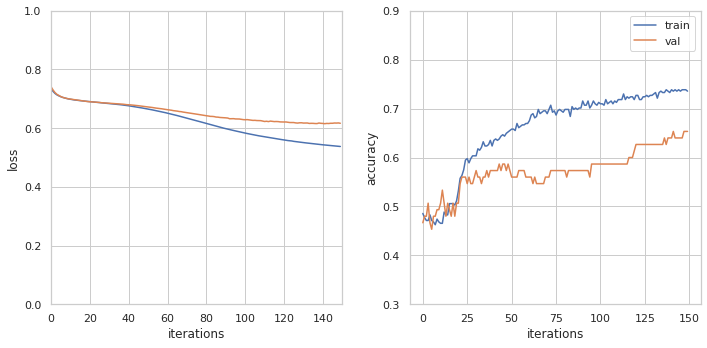


###########################################################

LOADING: model_h2_N4
Loaded model from disk
3/3 [==============================] - 0s 2ms/step - loss: 0.5406 - accuracy: 0.7200
[Accuracy] Train: 0.764, Test: 0.720
[Loss] Train: 0.532, Test: 0.541


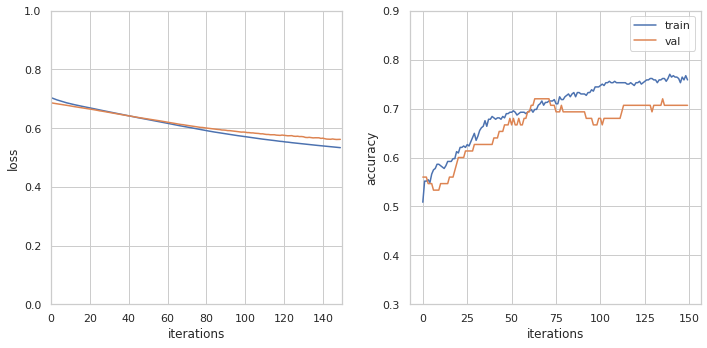


###########################################################

LOADING: model_h3_N4
Loaded model from disk
3/3 [==============================] - 0s 3ms/step - loss: 0.5594 - accuracy: 0.6667
[Accuracy] Train: 0.747, Test: 0.667
[Loss] Train: 0.552, Test: 0.559


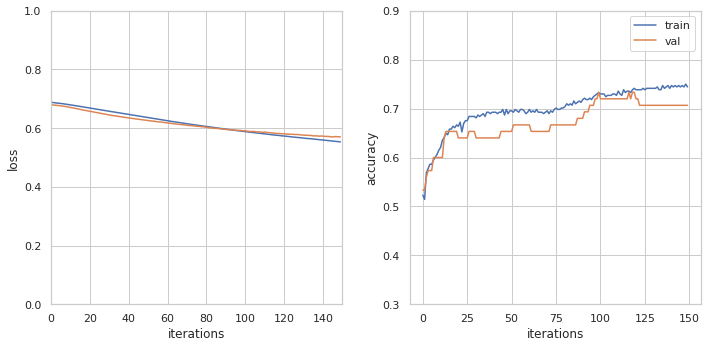


###########################################################

LOADING: model_h4_N4
Loaded model from disk
3/3 [==============================] - 0s 3ms/step - loss: 0.5594 - accuracy: 0.7200
[Accuracy] Train: 0.759, Test: 0.720
[Loss] Train: 0.537, Test: 0.559


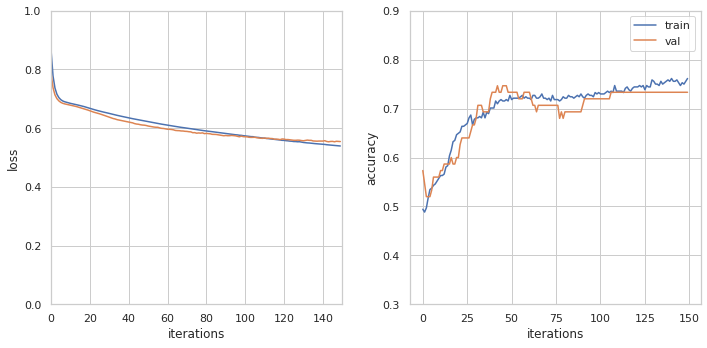


###########################################################

LOADING: model_h1_N5
Loaded model from disk
3/3 [==============================] - 0s 3ms/step - loss: 0.5681 - accuracy: 0.7067
[Accuracy] Train: 0.750, Test: 0.707
[Loss] Train: 0.535, Test: 0.568


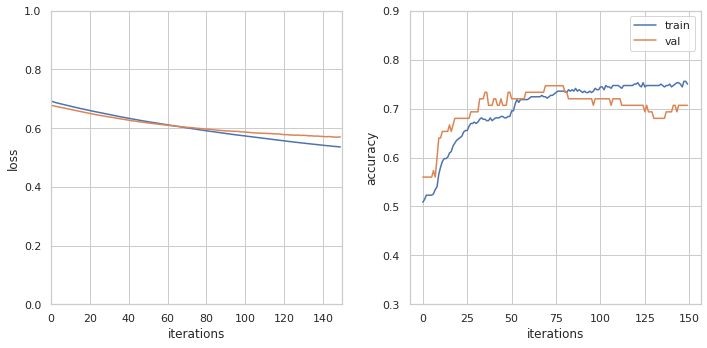


###########################################################

LOADING: model_h2_N5
Loaded model from disk
3/3 [==============================] - 0s 4ms/step - loss: 0.6702 - accuracy: 0.6400
[Accuracy] Train: 0.707, Test: 0.640
[Loss] Train: 0.571, Test: 0.670


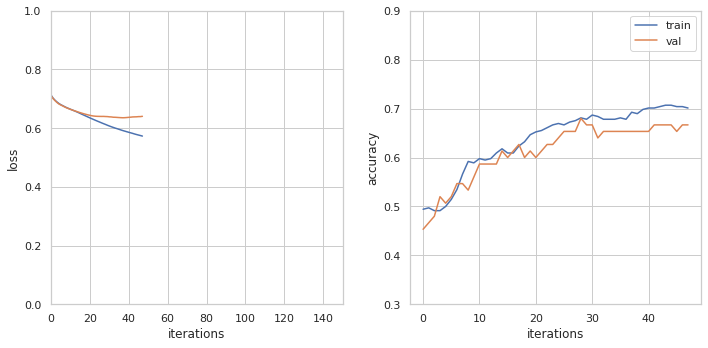


###########################################################

LOADING: model_h3_N5
Loaded model from disk
3/3 [==============================] - 0s 4ms/step - loss: 0.6090 - accuracy: 0.6000
[Accuracy] Train: 0.741, Test: 0.600
[Loss] Train: 0.546, Test: 0.609


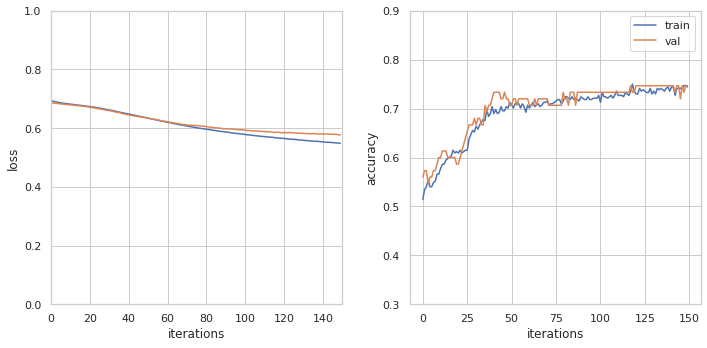


###########################################################

LOADING: model_h4_N5
Loaded model from disk
3/3 [==============================] - 0s 3ms/step - loss: 0.6420 - accuracy: 0.6800
[Accuracy] Train: 0.727, Test: 0.680
[Loss] Train: 0.530, Test: 0.642


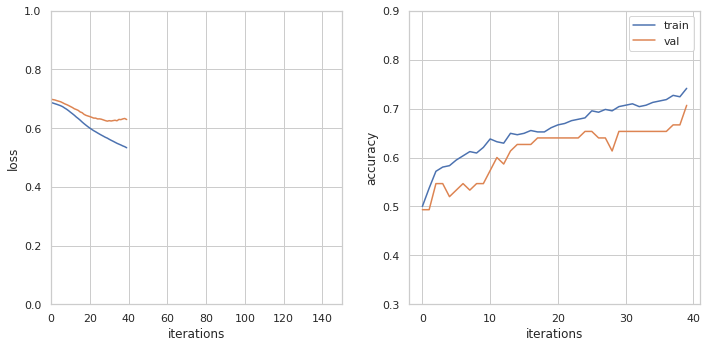


###########################################################

LOADING: model_h1_N6
Loaded model from disk
3/3 [==============================] - 0s 3ms/step - loss: 0.6607 - accuracy: 0.6000
[Accuracy] Train: 0.618, Test: 0.600
[Loss] Train: 0.615, Test: 0.661


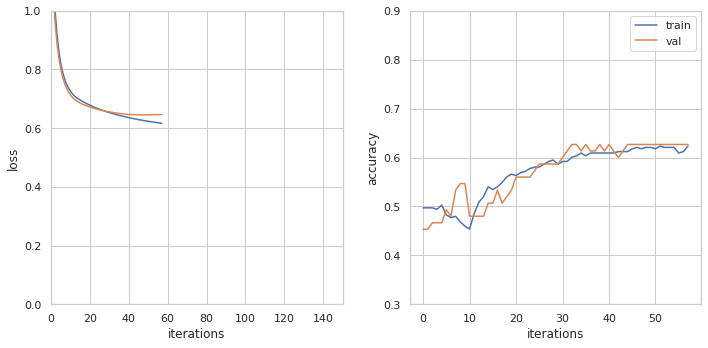


###########################################################

LOADING: model_h2_N6
Loaded model from disk
3/3 [==============================] - 0s 3ms/step - loss: 0.6378 - accuracy: 0.5867
[Accuracy] Train: 0.716, Test: 0.587
[Loss] Train: 0.554, Test: 0.638


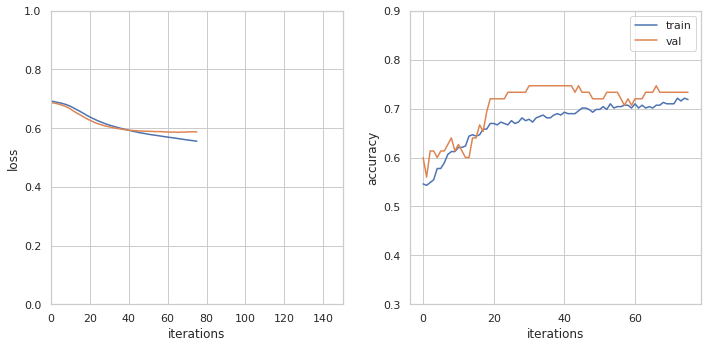


###########################################################

LOADING: model_h3_N6
Loaded model from disk
3/3 [==============================] - 0s 3ms/step - loss: 0.5836 - accuracy: 0.7200
[Accuracy] Train: 0.773, Test: 0.720
[Loss] Train: 0.455, Test: 0.584


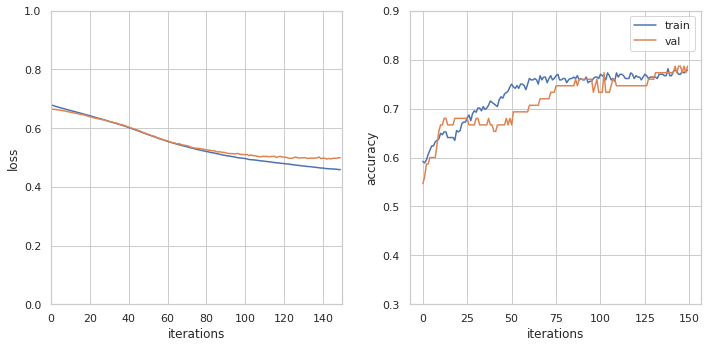


###########################################################

LOADING: model_h4_N6
Loaded model from disk
3/3 [==============================] - 0s 2ms/step - loss: 0.7370 - accuracy: 0.5467
[Accuracy] Train: 0.739, Test: 0.547
[Loss] Train: 0.531, Test: 0.737


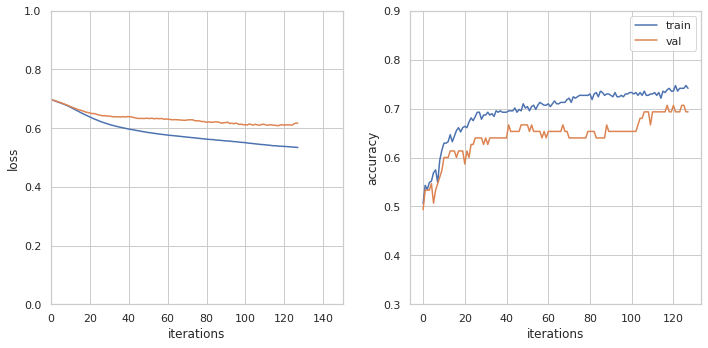


###########################################################

LOADING: model_h1_N7
Loaded model from disk
3/3 [==============================] - 0s 3ms/step - loss: 0.5772 - accuracy: 0.7200
[Accuracy] Train: 0.764, Test: 0.720
[Loss] Train: 0.513, Test: 0.577


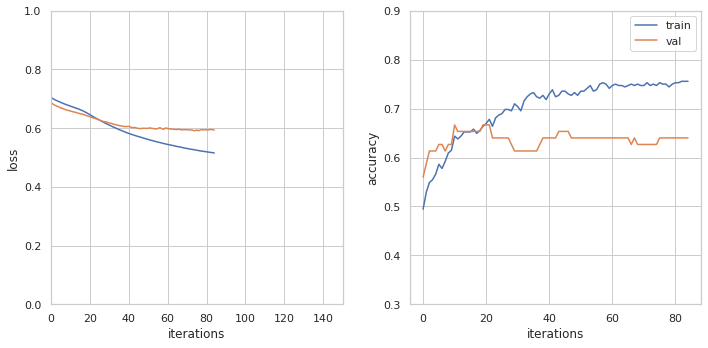


###########################################################

LOADING: model_h2_N7
Loaded model from disk
3/3 [==============================] - 0s 3ms/step - loss: 0.5662 - accuracy: 0.7067
[Accuracy] Train: 0.764, Test: 0.707
[Loss] Train: 0.483, Test: 0.566


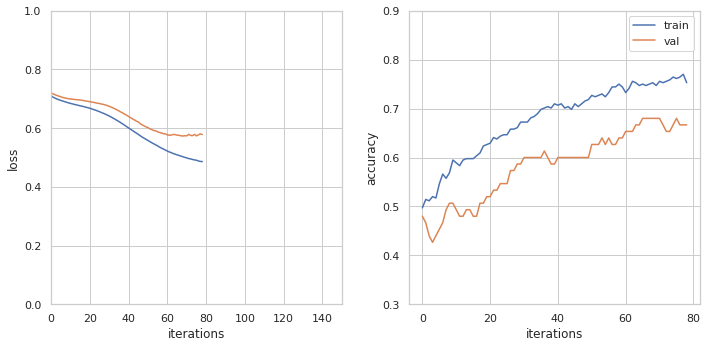


###########################################################

LOADING: model_h3_N7
Loaded model from disk
3/3 [==============================] - 0s 3ms/step - loss: 0.6249 - accuracy: 0.6667
[Accuracy] Train: 0.681, Test: 0.667
[Loss] Train: 0.598, Test: 0.625


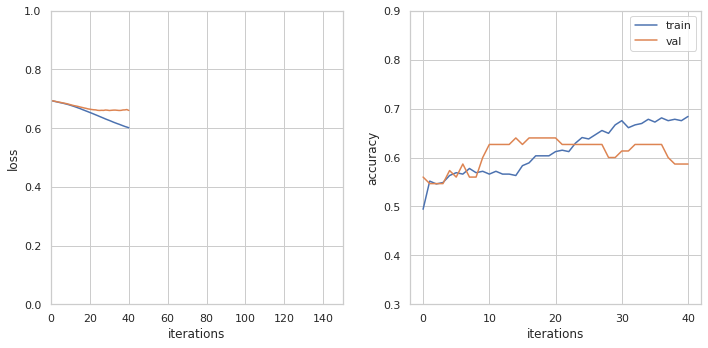


###########################################################

LOADING: model_h4_N7
Loaded model from disk
3/3 [==============================] - 0s 3ms/step - loss: 0.6633 - accuracy: 0.6267
[Accuracy] Train: 0.727, Test: 0.627
[Loss] Train: 0.525, Test: 0.663


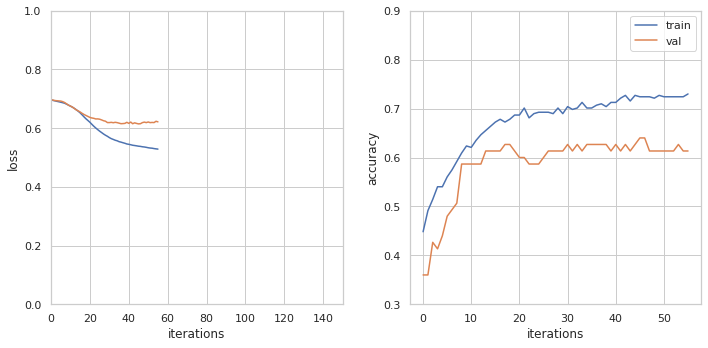


###########################################################

LOADING: model_h1_N8
Loaded model from disk
3/3 [==============================] - 0s 3ms/step - loss: 0.5806 - accuracy: 0.7333
[Accuracy] Train: 0.761, Test: 0.733
[Loss] Train: 0.502, Test: 0.581


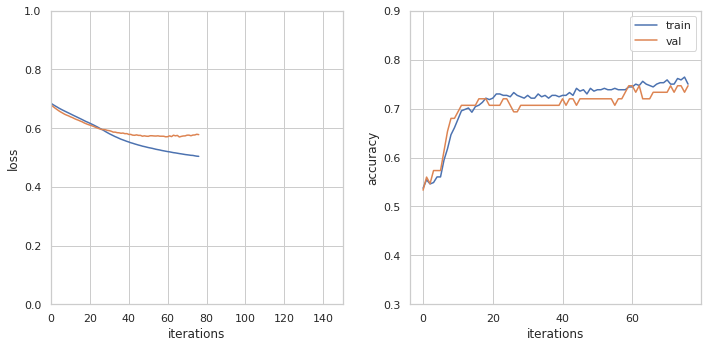


###########################################################

LOADING: model_h2_N8
Loaded model from disk
3/3 [==============================] - 0s 2ms/step - loss: 0.5967 - accuracy: 0.7333
[Accuracy] Train: 0.739, Test: 0.733
[Loss] Train: 0.519, Test: 0.597


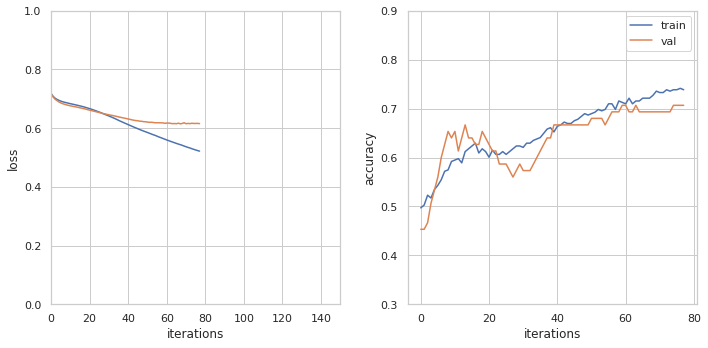


###########################################################

LOADING: model_h3_N8
Loaded model from disk
3/3 [==============================] - 0s 12ms/step - loss: 0.6782 - accuracy: 0.6133
[Accuracy] Train: 0.721, Test: 0.613
[Loss] Train: 0.529, Test: 0.678


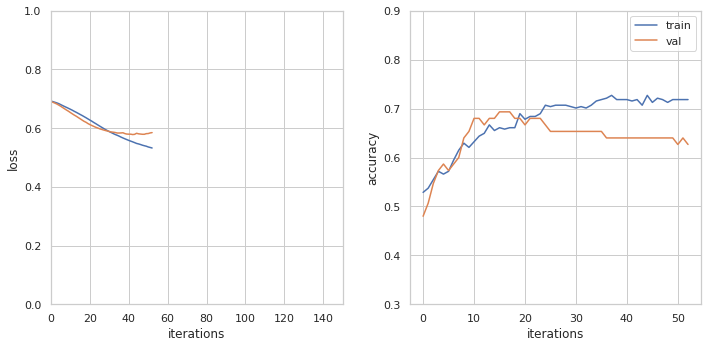


###########################################################

LOADING: model_h4_N8
Loaded model from disk
3/3 [==============================] - 0s 3ms/step - loss: 0.6511 - accuracy: 0.6933
[Accuracy] Train: 0.724, Test: 0.693
[Loss] Train: 0.543, Test: 0.651


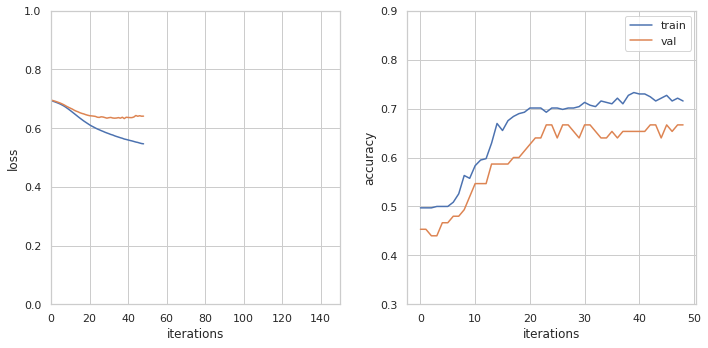


###########################################################

LOADING: model_h1_N9
Loaded model from disk
3/3 [==============================] - 0s 3ms/step - loss: 0.6238 - accuracy: 0.6267
[Accuracy] Train: 0.724, Test: 0.627
[Loss] Train: 0.544, Test: 0.624


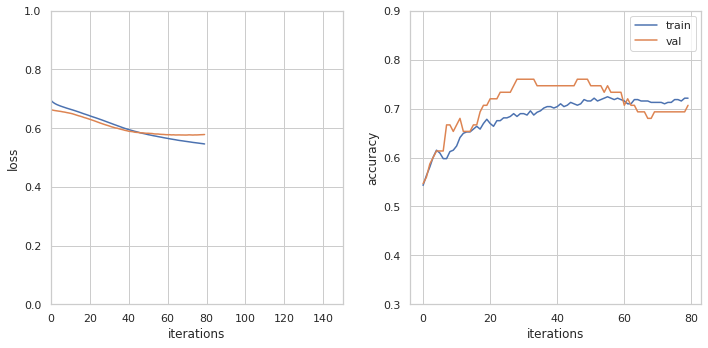


###########################################################

LOADING: model_h2_N9
Loaded model from disk
3/3 [==============================] - 0s 3ms/step - loss: 0.6343 - accuracy: 0.6533
[Accuracy] Train: 0.744, Test: 0.653
[Loss] Train: 0.492, Test: 0.634


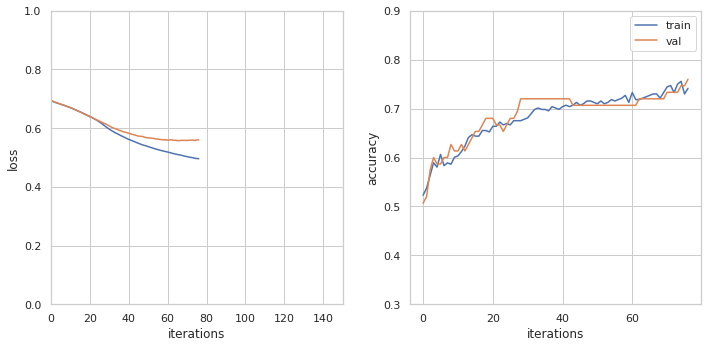


###########################################################

LOADING: model_h3_N9
Loaded model from disk
3/3 [==============================] - 0s 3ms/step - loss: 0.6116 - accuracy: 0.6667
[Accuracy] Train: 0.753, Test: 0.667
[Loss] Train: 0.515, Test: 0.612


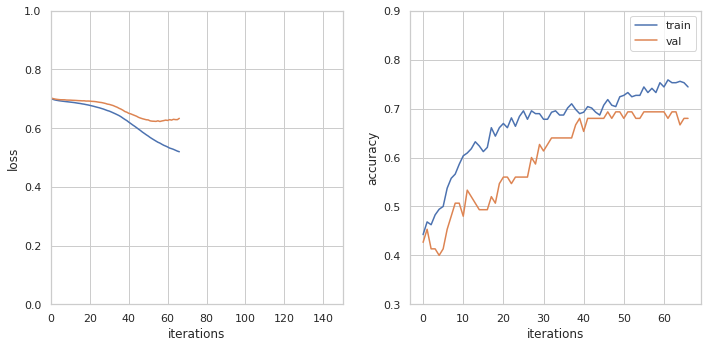


###########################################################

LOADING: model_h4_N9
Loaded model from disk
3/3 [==============================] - 0s 4ms/step - loss: 0.6899 - accuracy: 0.5867
[Accuracy] Train: 0.675, Test: 0.587
[Loss] Train: 0.588, Test: 0.690


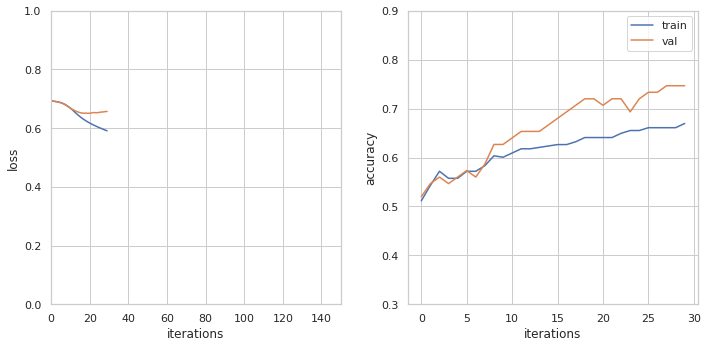


###########################################################

LOADING: model_h1_N10
Loaded model from disk
3/3 [==============================] - 0s 3ms/step - loss: 0.6173 - accuracy: 0.6667
[Accuracy] Train: 0.747, Test: 0.667
[Loss] Train: 0.522, Test: 0.617


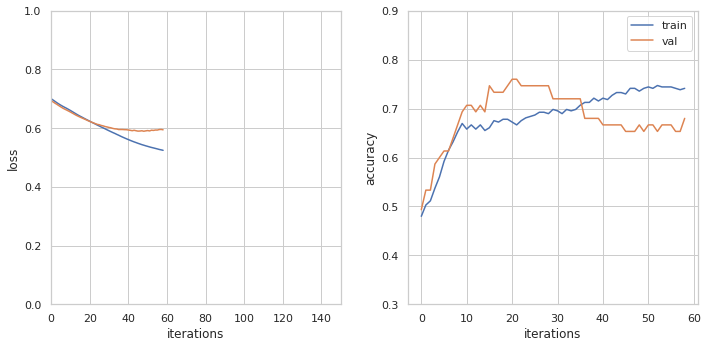


###########################################################

LOADING: model_h2_N10
Loaded model from disk
3/3 [==============================] - 0s 3ms/step - loss: 0.5492 - accuracy: 0.7200
[Accuracy] Train: 0.776, Test: 0.720
[Loss] Train: 0.485, Test: 0.549


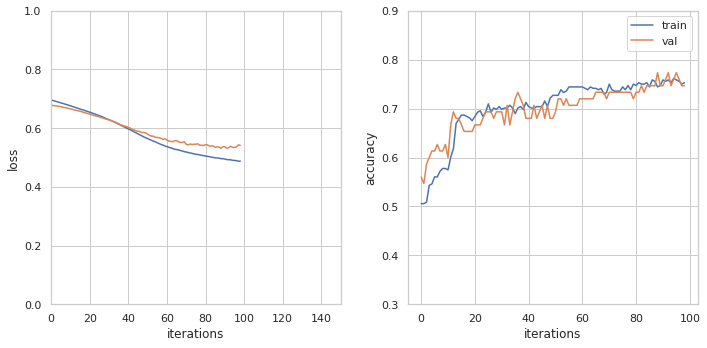


###########################################################

LOADING: model_h3_N10
Loaded model from disk
1/3 [=========>....................] - ETA: 0s - loss: 0.7521 - accuracy: 0.5625

In [ ]:
sns.set(style='whitegrid')
tf.get_logger().setLevel('ERROR')
for m in models:
    
    model_name = m.name
    print("LOADING: " + model_name)

    # load the model
    model_loaded = load_model( model_name,  models_path )
#     print(model_loaded.summary()) # print the model architecture
    optim = keras.optimizers.Nadam(lr=0.0001, beta_1=0.9, beta_2=0.999)
    model_loaded.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

    train_loss,train_acc= model_loaded.evaluate(X_train, Y_train, verbose=1)
    test_loss,test_acc = model_loaded.evaluate(X_test, Y_test, verbose=1)
    print('[Accuracy] Train: %.3f, Test: %.3f' % (train_acc, test_acc))
    print('[Loss] Train: %.3f, Test: %.3f' % (train_loss, test_loss))

    # load the learning curve information
    model_hist_loaded = load_model_history( model_name, models_path)
    plot_training_curve(model_hist_loaded)
    print('\n###########################################################\n')

## Analysis of Neural Network Model

To determine the best model, two hyperparameters are adjusted in the experimental which are the number of hidden layer and neurons. The range of number of hidden layers is from 1 to 4 and the range of number of neurons is from 4 to 12. Then, the accuracy of train and test dataset will be used to select the best model.

In our report, the best model is `model_h2_N10` which has **2 hidden layers** and **10 neurons**.


In [ ]:
# Good MODEL
best_model_name = "model_h2_N10"


In [ ]:
best_model_hist_loaded = load_model_history( best_model_name, models_path )
best_model_loaded = load_model( best_model_name,  models_path )
print(best_model_loaded.summary())

In [ ]:
print("EVALUATING BEST MODEL:")
optim = keras.optimizers.Nadam(lr=0.0001, beta_1=0.9, beta_2=0.999)
best_model_loaded.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

train_loss,train_acc= best_model_loaded.evaluate(X_train, Y_train, verbose=1)
test_loss,test_acc = best_model_loaded.evaluate(X_test, Y_test, verbose=1)
print('[Accuracy] Train: %.3f, Test: %.3f' % (train_acc, test_acc))
print('[Loss] Train: %.3f, Test: %.3f' % (train_loss, test_loss))

In [ ]:
plt.plot(best_model_hist_loaded['accuracy'], label='train')
plt.plot(best_model_hist_loaded['val_accuracy'], label='test')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.ylim([0.3, 0.8])
plt.legend()
plt.show()

plt.plot(best_model_hist_loaded['loss'], label='train')
plt.plot(best_model_hist_loaded['val_loss'], label='test')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.ylim([0, 1])
plt.legend()
plt.show()

## Analyse the result

In [ ]:
predictions = enc.inverse_transform(best_model_loaded.predict( X_test ))

print("Before transformation")
print(best_model_loaded.predict( X_test )[0:10])
print("\nAfter transformation\n")
print(predictions[0:10])

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import cm

groundtruth = enc.inverse_transform( Y_test )

labels = ["Not Stroke", "Stroke"]

mat = confusion_matrix(groundtruth, predictions)
sns.heatmap(mat.T, square=True, cbar=True, xticklabels=labels, \
            yticklabels=labels, annot=True, cmap=cm.viridis)

plt.xlabel('true label')
plt.ylabel('predicted label');

## Lime

To show the explanation of the model, LIME is applied in 4 different cases which are false positive, true negative, false negative and true negative. The result is shown above and there are some points in the analysis. 

In [ ]:
import lime
from lime import lime_tabular

In [ ]:
MAX_FEAT = len(feature_names)

explainer = lime_tabular.LimeTabularExplainer(X_scaled, feature_names= feature_names, 
                                                  class_names=labels, verbose=False, mode='classification')

### Analysis different situation in good model
1. False positive
    - Groundtruth: No stroke
    - Prediction:  Stroke

2. True Negative
    - Groundtruth: No Stroke
    - Prediction:  No Stroke
    
3. False Negative
    - Groundtruth: Stroke
    - Prediction:  No Stroke

4. True positive:
    - Groundtruth: Stroke
    - Prediction:  Stroke

### False Positive

In [ ]:
# let's take a look at our data
# for patient_indx in range(0, len(X_scaled)):

#     patients_feat = X_scaled[patient_indx,:]
#     patients_true_pred = enc.inverse_transform(np.expand_dims(Y[patient_indx,:], 0))[0][0]

#     # prediction
#     pred = best_model_loaded.predict(np.expand_dims(patients_feat, 0))
#     pred = enc.inverse_transform( pred )[0][0]

#     print("Patient id: %d \t Predicted: %s \t True Diagnosis: %s\n" 
#       %(patient_indx, "Stroke" if pred else "No Stroke", "Stroke" if patients_true_pred else "No Stroke"))

In [ ]:
patient_indx = 263

patient_feat = X_scaled[patient_indx,:]
patient_true_pred = enc.inverse_transform(np.expand_dims(Y[patient_indx,:], 0))[0][0]

pred_good = best_model_loaded.predict(np.expand_dims(patient_feat, 0))
pred_good = enc.inverse_transform(pred_good)[0][0]


print("Patient id: %d \t Good Model Predicted: %s \t True Diagnosis: %s\n" 
      %(patient_indx, "Stroke" if pred_good else "No Stroke", "Stroke" if patient_true_pred else "No Stroke"))

In [ ]:
# explain instance using a good model
exp_good = explainer.explain_instance(patient_feat, best_model_loaded.predict, num_features= MAX_FEAT)

In [ ]:
exp_good.show_in_notebook(show_table=True)

In [ ]:
fig = exp_good.as_pyplot_figure()

### True Negative

In [ ]:
patient_indx = 283

patient_feat = X_scaled[patient_indx,:]
patient_true_pred = enc.inverse_transform(np.expand_dims(Y[patient_indx,:], 0))[0][0]

pred_good = best_model_loaded.predict(np.expand_dims(patient_feat, 0))
pred_good = enc.inverse_transform(pred_good)[0][0]


print("Patient id: %d \t Good Model Predicted: %s \t True Diagnosis: %s\n" 
      %(patient_indx, "Stroke" if pred_good else "No Stroke", "Stroke" if patient_true_pred else "No Stroke"))

In [ ]:
# explain instance using a good model
exp_good = explainer.explain_instance(patient_feat, best_model_loaded.predict, num_features= MAX_FEAT)

In [ ]:
exp_good.show_in_notebook(show_table=True)

In [ ]:
fig = exp_good.as_pyplot_figure()

### False negative

In [ ]:
patient_indx = 106

patient_feat = X_scaled[patient_indx,:]
patient_true_pred = enc.inverse_transform(np.expand_dims(Y[patient_indx,:], 0))[0][0]

pred_good = best_model_loaded.predict(np.expand_dims(patient_feat, 0))
pred_good = enc.inverse_transform(pred_good)[0][0]


print("Patient id: %d \t Good Model Predicted: %s \t True Diagnosis: %s\n" 
      %(patient_indx, "Stroke" if pred_good else "No Stroke", "Stroke" if patient_true_pred else "No Stroke"))

In [ ]:
# explain instance using a good model
exp_good = explainer.explain_instance(patient_feat, best_model_loaded.predict, num_features= MAX_FEAT)

In [ ]:
exp_good.show_in_notebook(show_table=True)

In [ ]:
fig = exp_good.as_pyplot_figure()

### True Positive

In [ ]:
patient_indx = 100

patient_feat = X_scaled[patient_indx,:]
patient_true_pred = enc.inverse_transform(np.expand_dims(Y[patient_indx,:], 0))[0][0]

pred_good = best_model_loaded.predict(np.expand_dims(patient_feat, 0))
pred_good = enc.inverse_transform(pred_good)[0][0]


print("Patient id: %d \t Good Model Predicted: %s \t True Diagnosis: %s\n" 
      %(patient_indx, "Stroke" if pred_good else "No Stroke", "Stroke" if patient_true_pred else "No Stroke"))

In [ ]:
# explain instance using a good model
exp_good = explainer.explain_instance(patient_feat, best_model_loaded.predict, num_features= MAX_FEAT)

In [ ]:
exp_good.show_in_notebook(show_table=True)

In [ ]:
fig = exp_good.as_pyplot_figure()

1. Firstly, the case of **false negative** may cause serious result, so it needs to be noticed. The patient who has stroke is misdiagnosed as not stroke is the case of false negative. The probability of not stroke is **0.52**, which means the model is **not confident** on the prediction.  

2. Secondly, in the other wrong prediction case which is **false positive**. False positive means the patient who is not stroke is misdiagnosed as stroke by the model. In this situation, it might cost additional medical resource to treat the patient. The most serious problem in this case is that the probability of stoke is **0.84**, which means the model is **highly confident** on the prediction. 

3. Thirdly, in all cases, `work type` has huge influence when model makes the prediction. In this situation, the model will have high probability to predict the patient is **stroke** when `work type` is **not children** and will have high probability predict the patient is **not stroke** when `work type` is **children**.

To sum up, with the local explanation of neural network model, there are some patients cannot be predicted. Moreover, `work_type_children` has more influence than other features in dataset.


# Insight

Despite the accuracy of result is high, it is not recommended to help the medical workers diagnose the stroke with this model. In the analysis, the model makes correct prediction with high confidence, however, it also has high confidence in the false positive case which is wrong prediction case. In this situation, the medical organisation will waste many medical resources on the health individuals. Moreover, the local explanation shows that `work_type_children` feature has huge impact on making prediction, which might need further analyse.

For patients, they can self-diagnose with the support of the model with LIME since the model has low confidence on making prediction in false negative case. Additionally, when the patients are identified as stroke by the model, they need to go to medical institution to have further inspection.


# Issue

## Dataset
The dataset is created by fedesoriano in [Kaggle]( https://www.kaggle.com/fedesoriano/stroke-prediction-dataset), however, the source of dataset is confidential which means the time, place and approach of collecting are all unknown. In this situation, the correctness of the dataset needs to be considered, but the ethic of the dataset is high since nobody will be identified with the information in the dataset. In this dataset, there might have privacy issues when collecting the patients’ health data, but the personal information is not very sensitive.

Another issue is that the dataset is highly unbalanced. There are only 5% of patients is stroke in this dataset, so the resample technique need to be applied to decrease the number of patients who is not stroke. However, there might exist bias when resample the dataset, for example, the resample algorithm just select the patients with old age. Moreover, the resample dataset may not be used to represent the original dataset and it will affect the training of model.

## Model
The hyperparameters which are adjusted to decide the best neural network just include hidden layer and neurons. However, there are still many difference hyperparameters which can be changed in the algorithm, such as, loss function, optimisation function, activation and so on. Another problem of neural network is that it is hard to interpret the result of model. The algorithm calculates the weight of each feature in the black-box, and just show the result of calculation. As a result, scientists cannot understand why and how the machines make the decision.

Moreover, there is a wired situation need to be noticed in this report. There are many different models has 0.72 test accuracy, however, they have different train accuracy. Consequently, there might exist some factors which can influence the training of the model.
